In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal','Density']

In [4]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

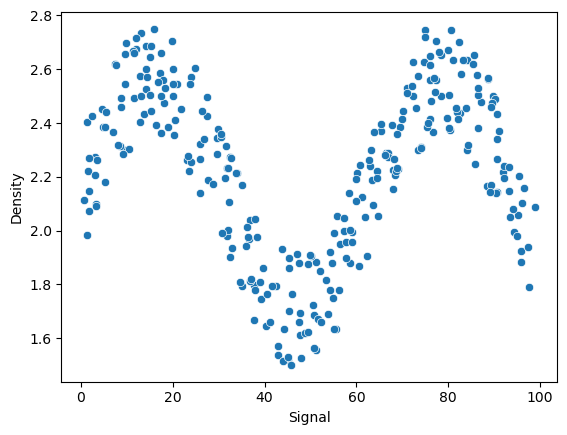

In [6]:
sns.scatterplot(x=df['Signal'],y=df['Density'])

In [13]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_p = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mean_absolute_error(y_test,lr_p)

0.211198973318633

In [22]:
np.sqrt(mean_squared_error(y_test,lr_p))

0.2570051996584629

In [26]:
sig_range = np.arange(0,100)
sig_pred = model.predict(sig_range.reshape(-1,1))
sig_pred

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

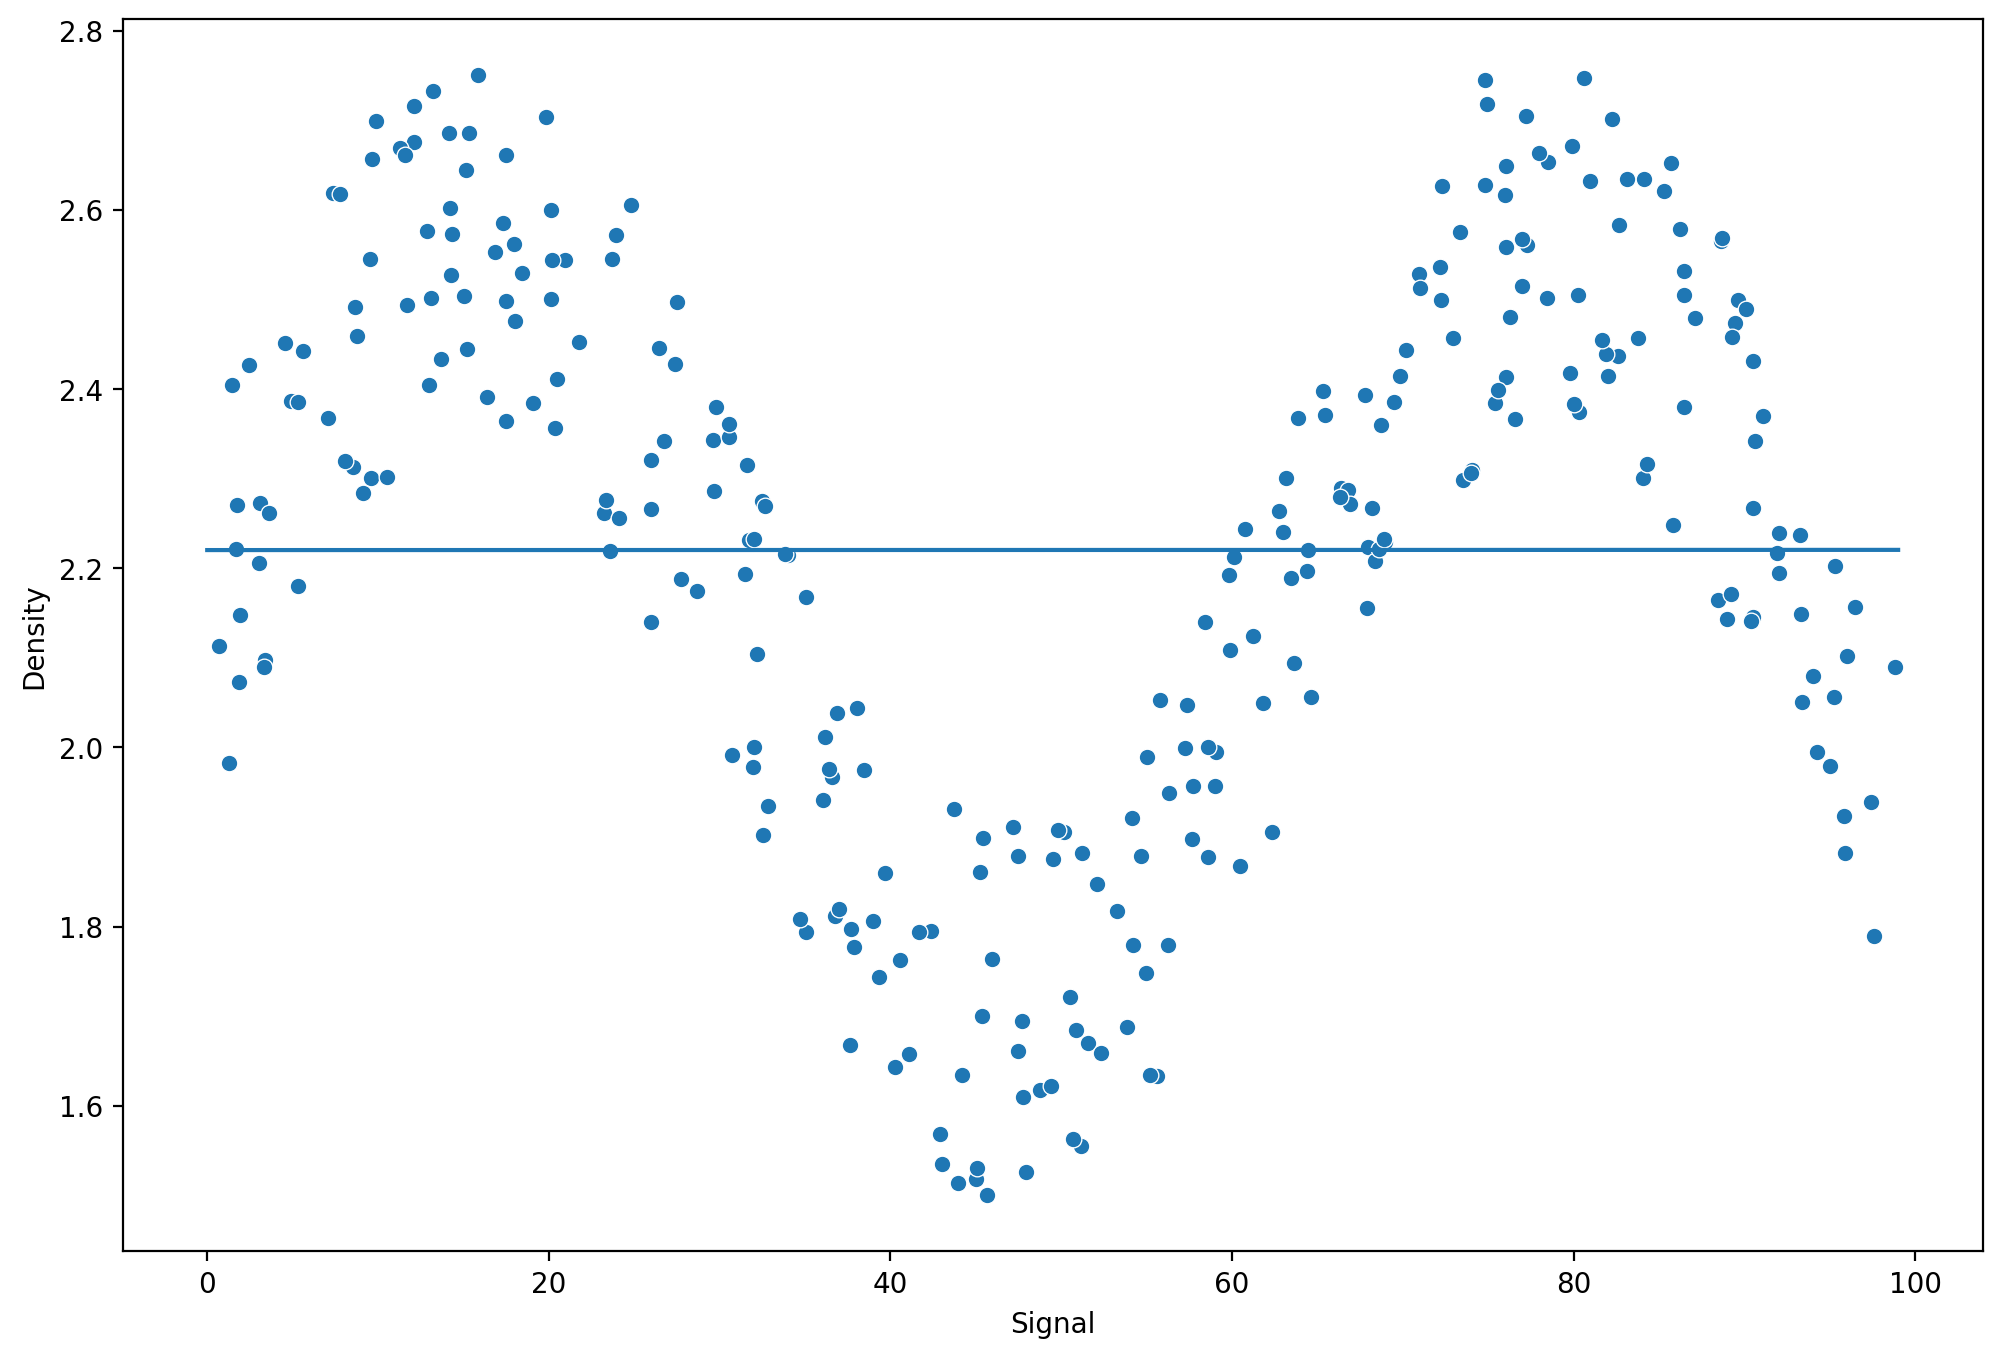

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x=df['Signal'],y=df['Density'])
plt.plot(sig_range,sig_pred)

In [31]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    p = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,p))
    mae = mean_absolute_error(y_test,p)
    print(f'RMSE: {rmse}')
    print(f'MSE: {mae}')
    sig_range = np.arange(0,100)
    sig_pred = model.predict(sig_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x=df['Signal'],y=df['Density'])
    plt.plot(sig_range,sig_pred)


RMSE: 0.2570051996584629
MSE: 0.211198973318633


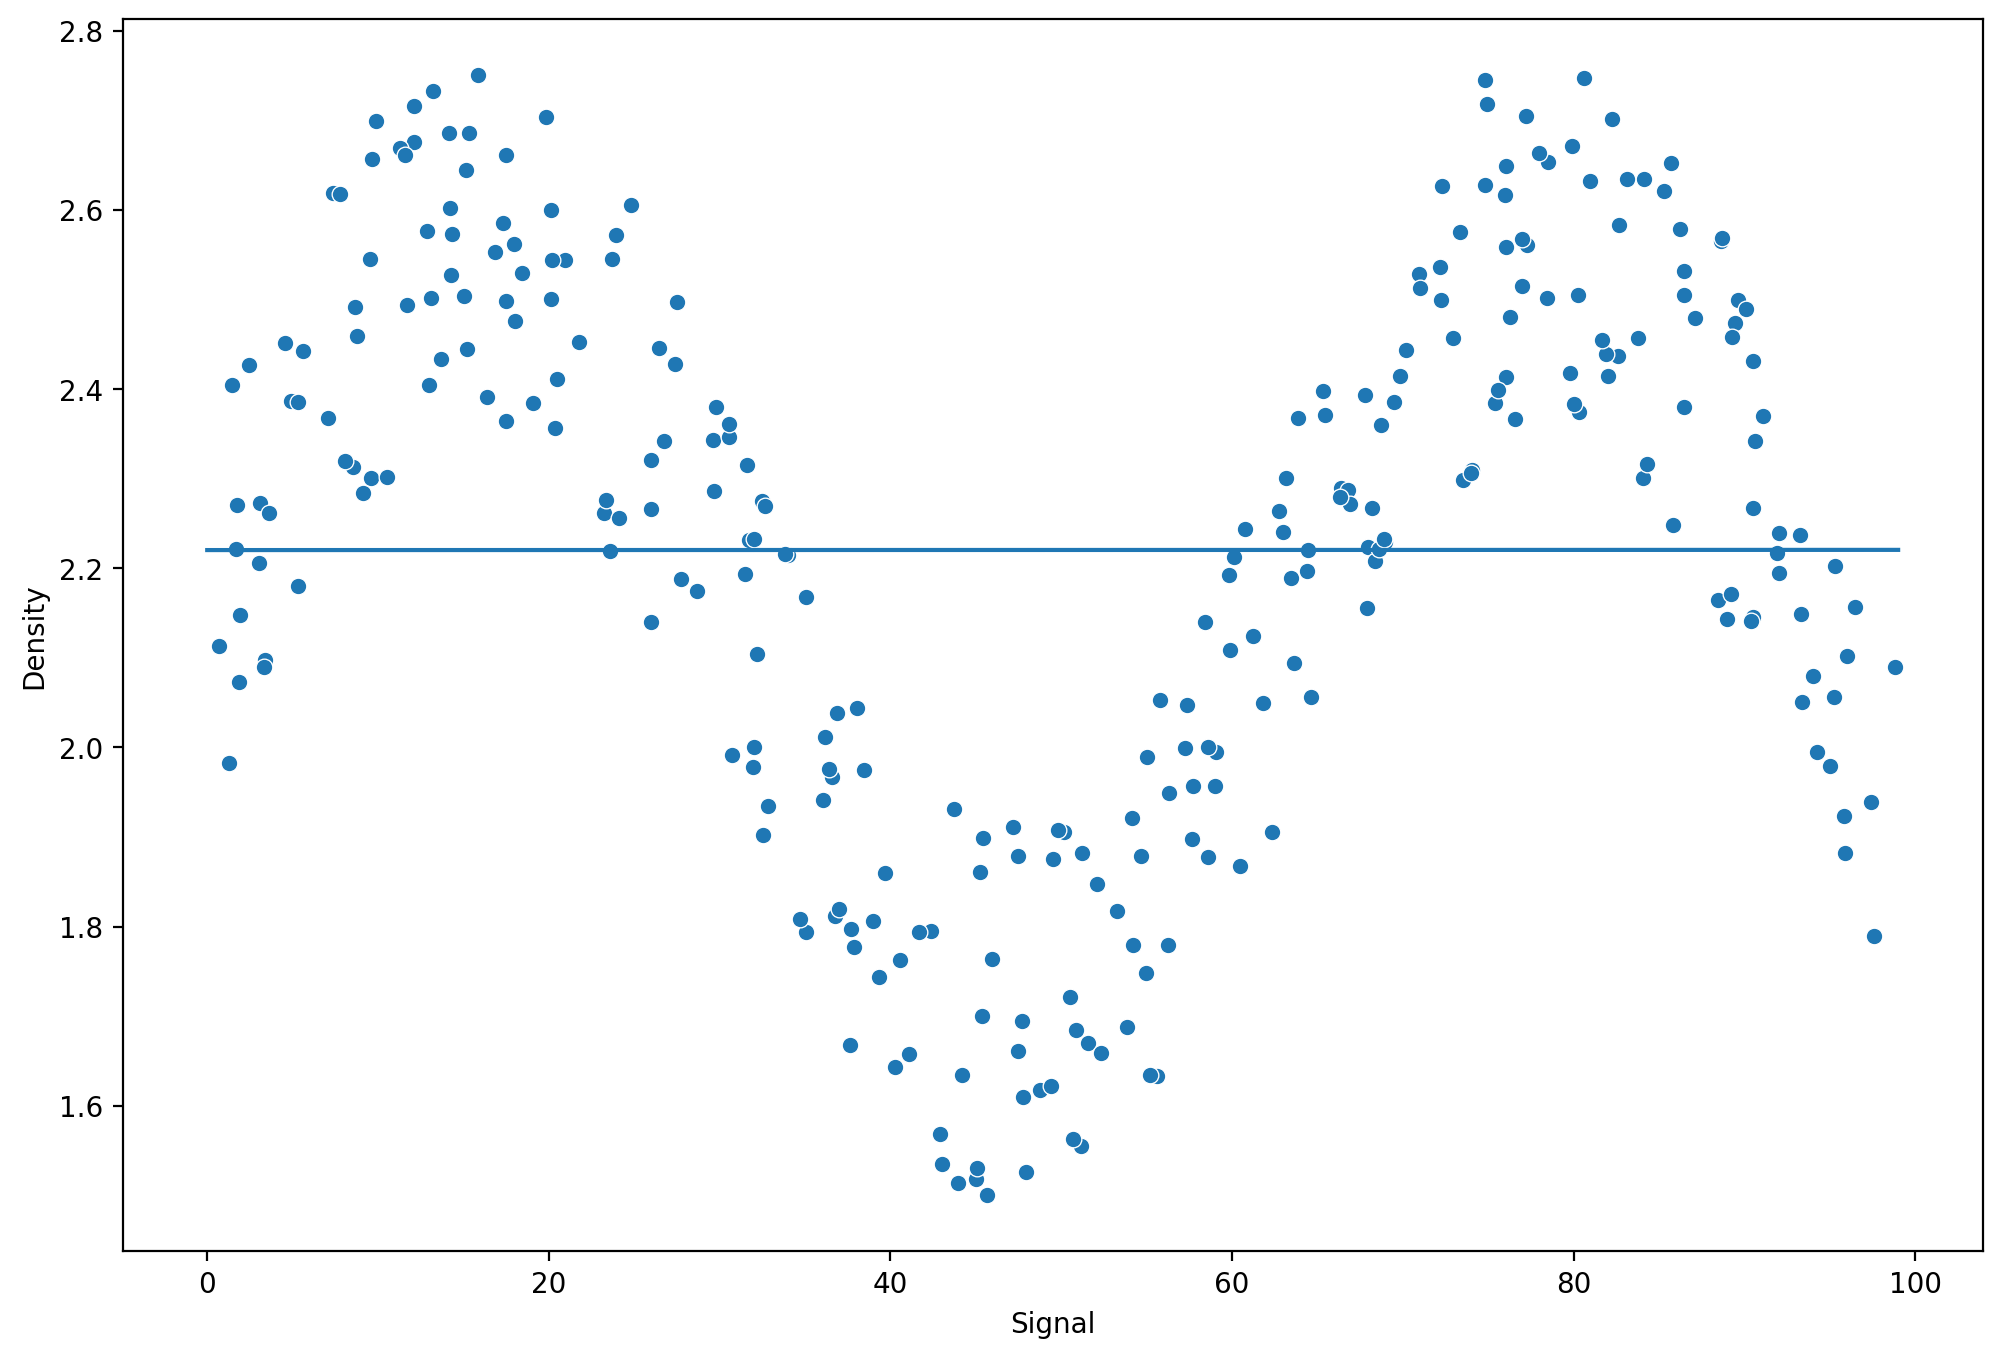

In [32]:
run_model(model,X_train,X_test,y_train,y_test)

RMSE: 0.13807393332369194
MSE: 0.11969091608862585


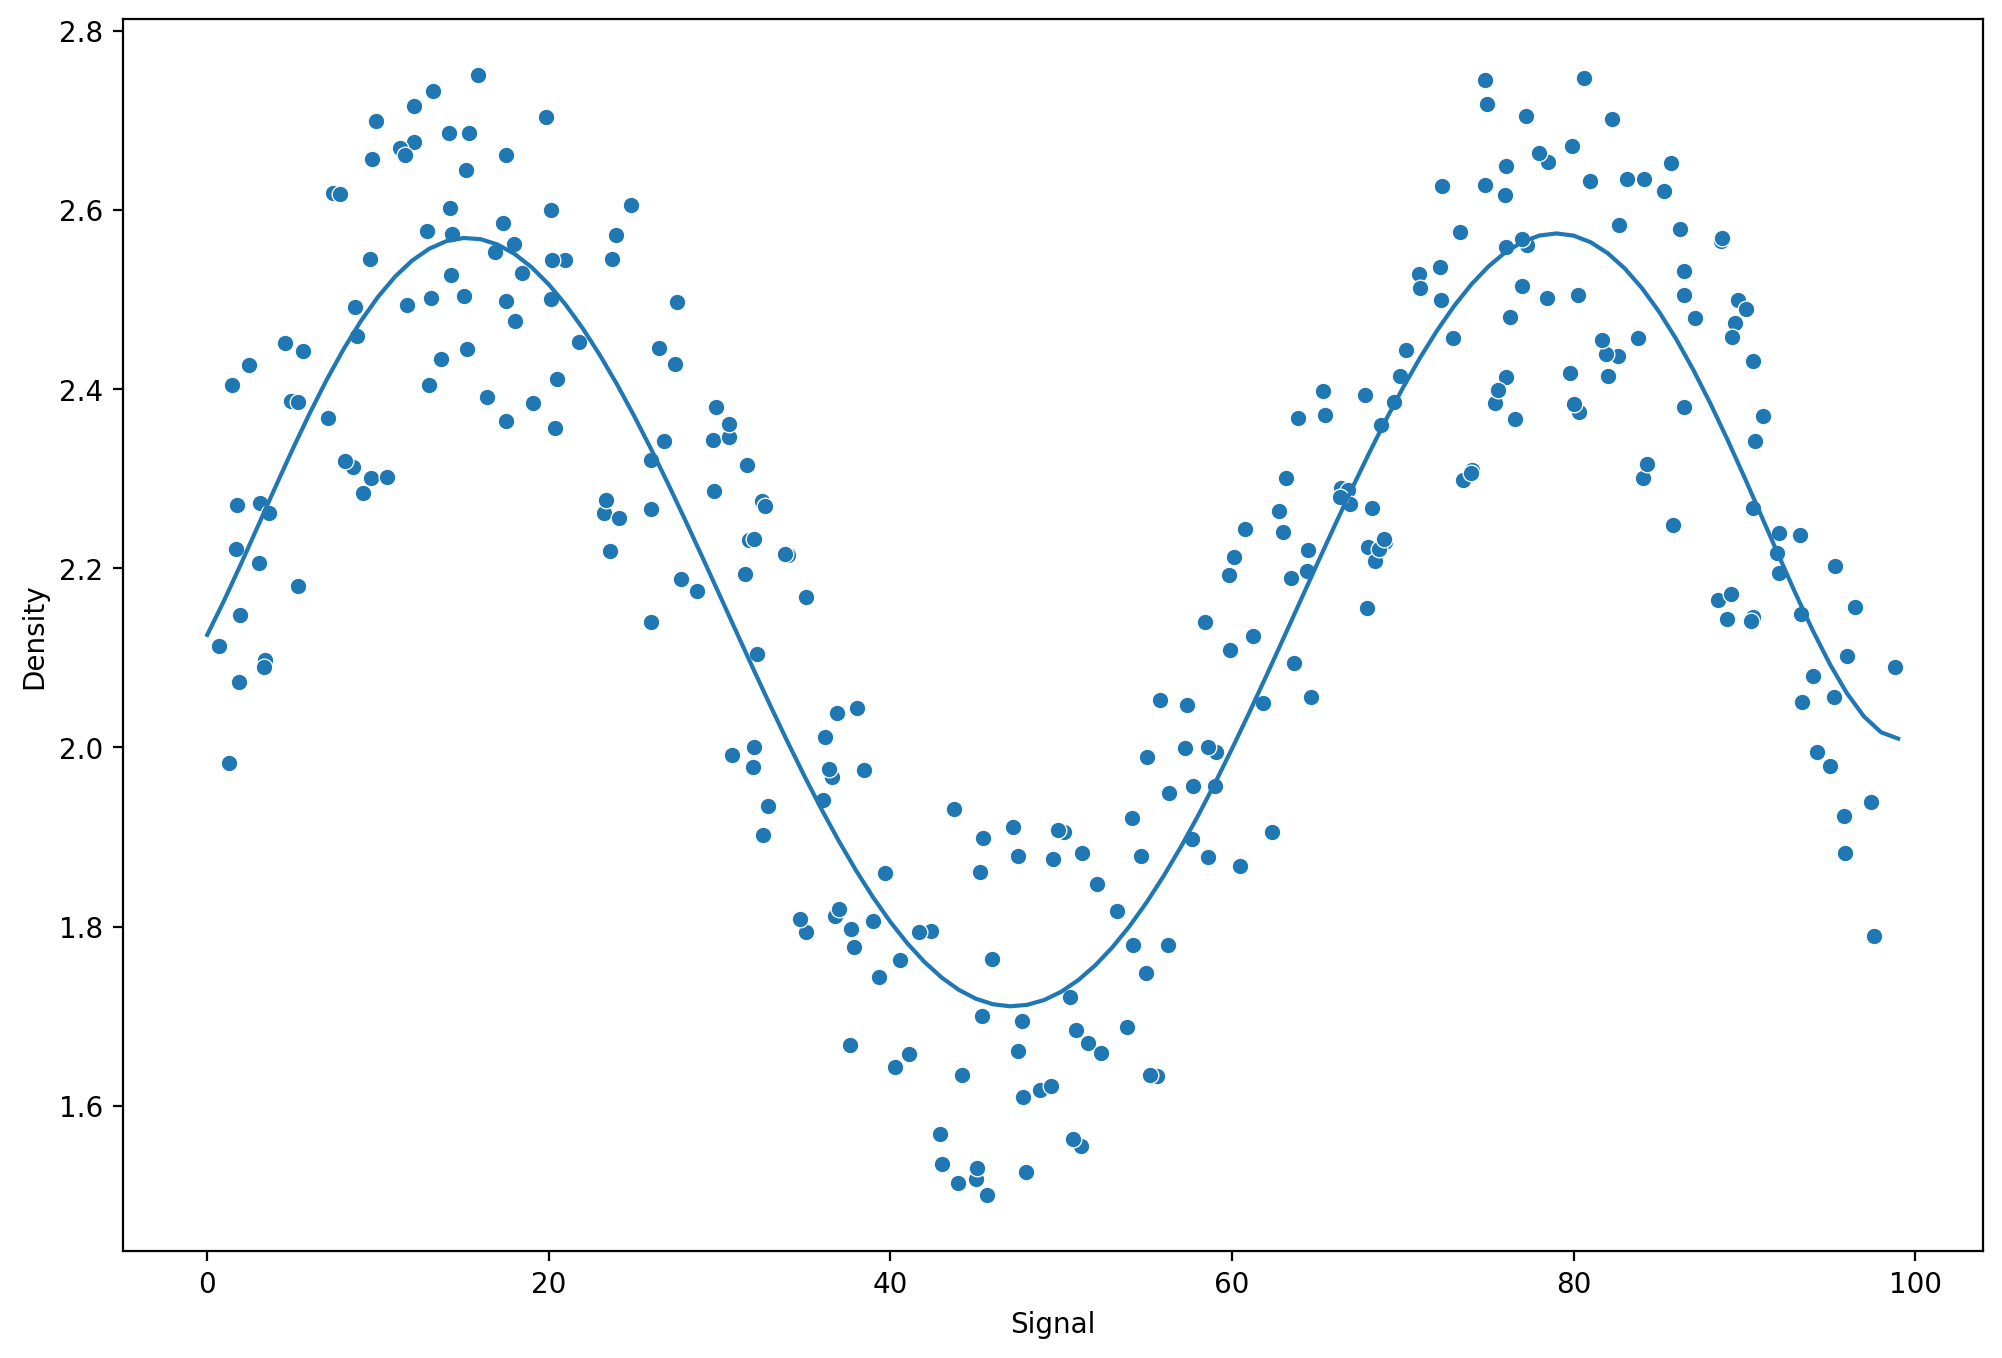

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MSE: 0.11877297474442378
RMSE: 0.13730685016923647
MSE: 0.12198383614100558
RMSE: 0.13277855732740926
MSE: 0.11635971693292672


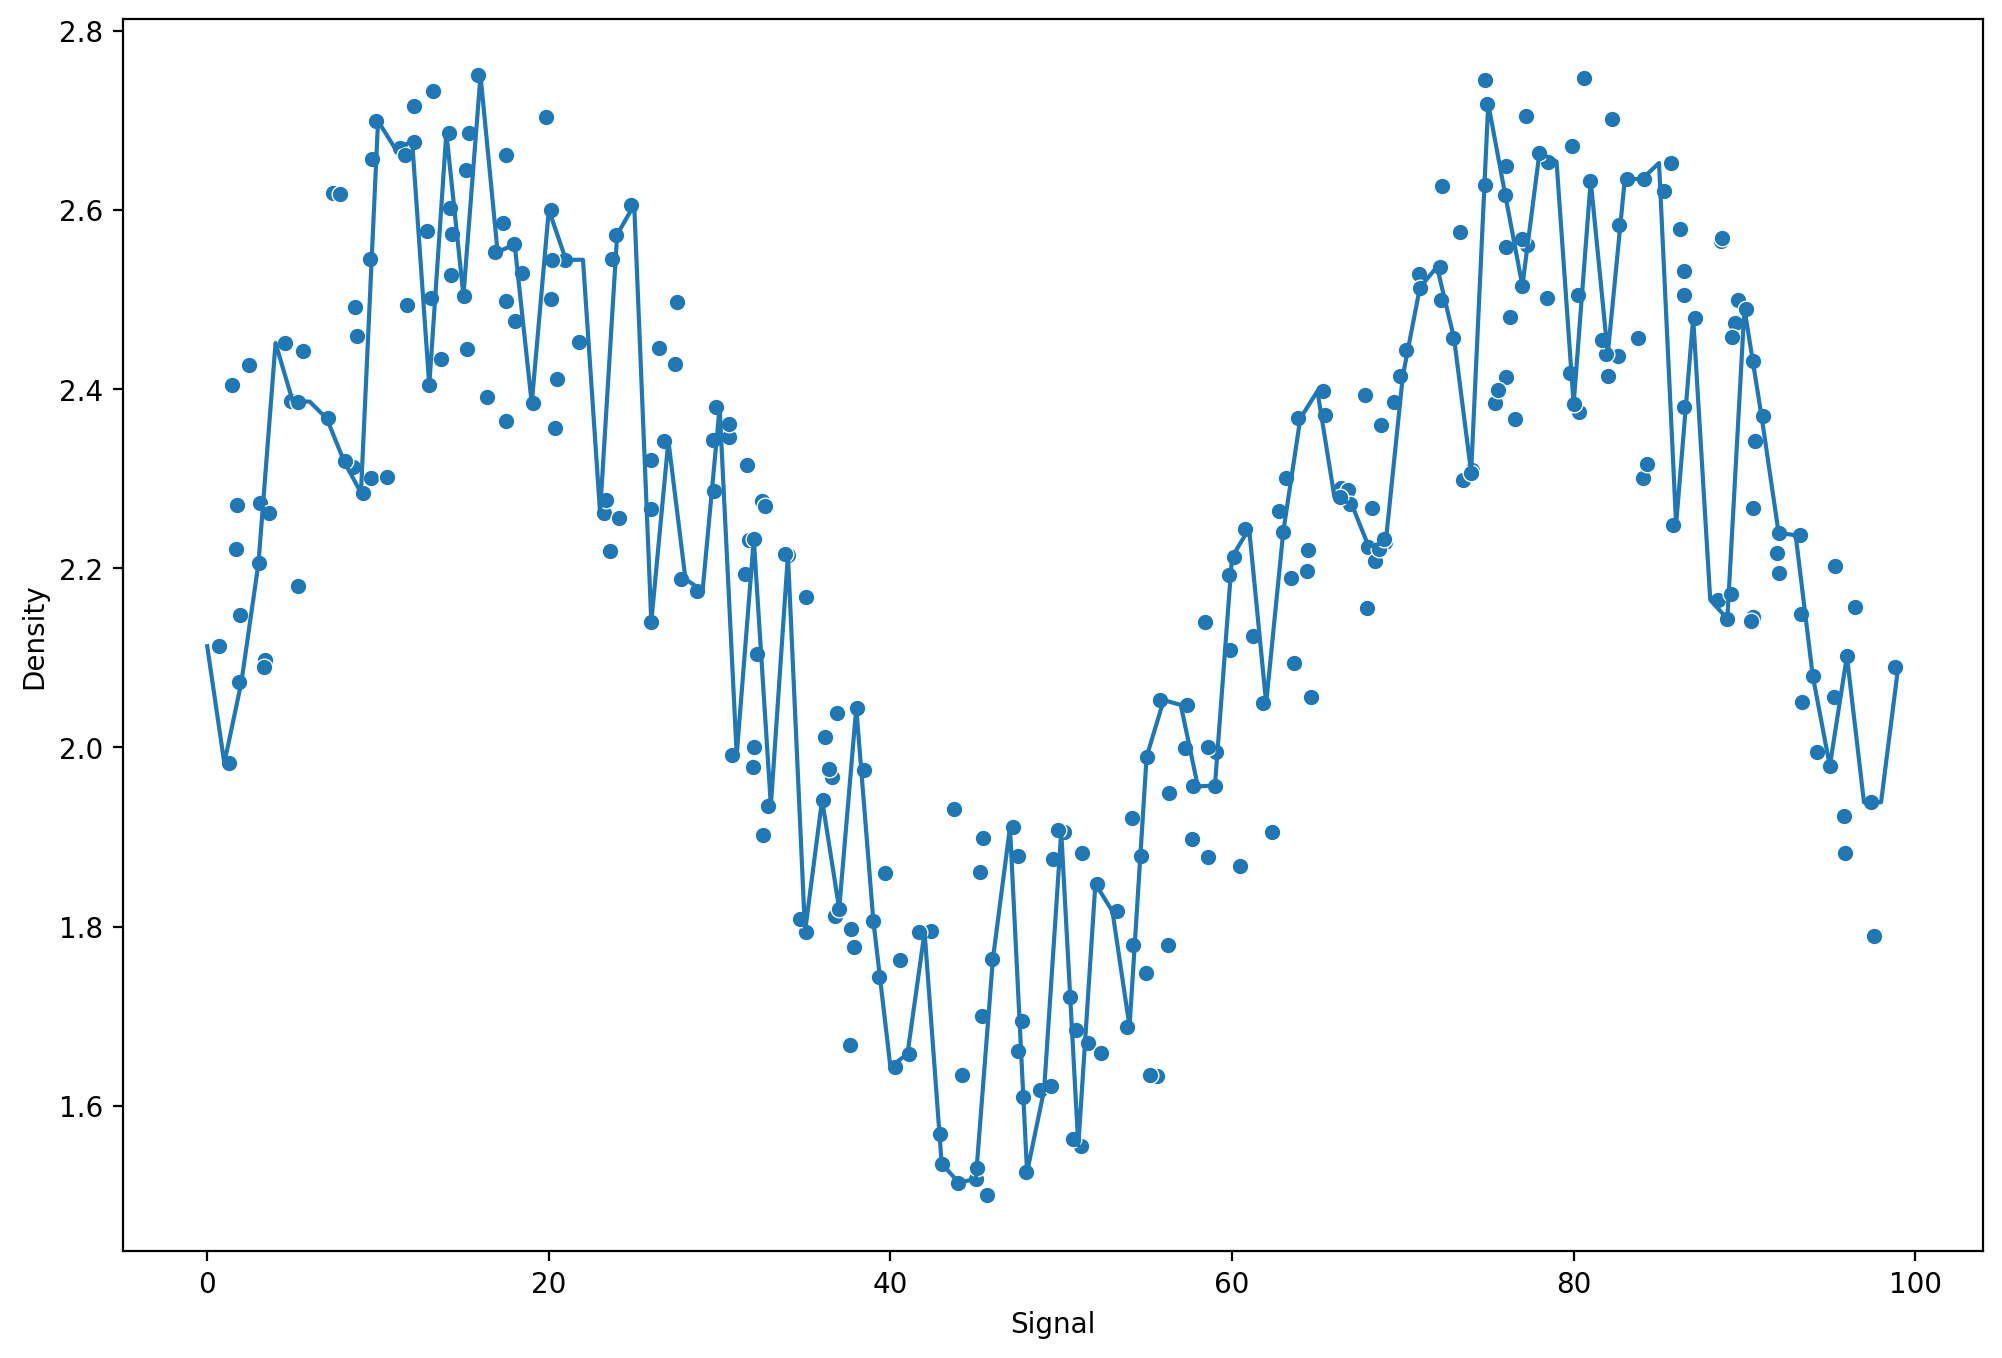

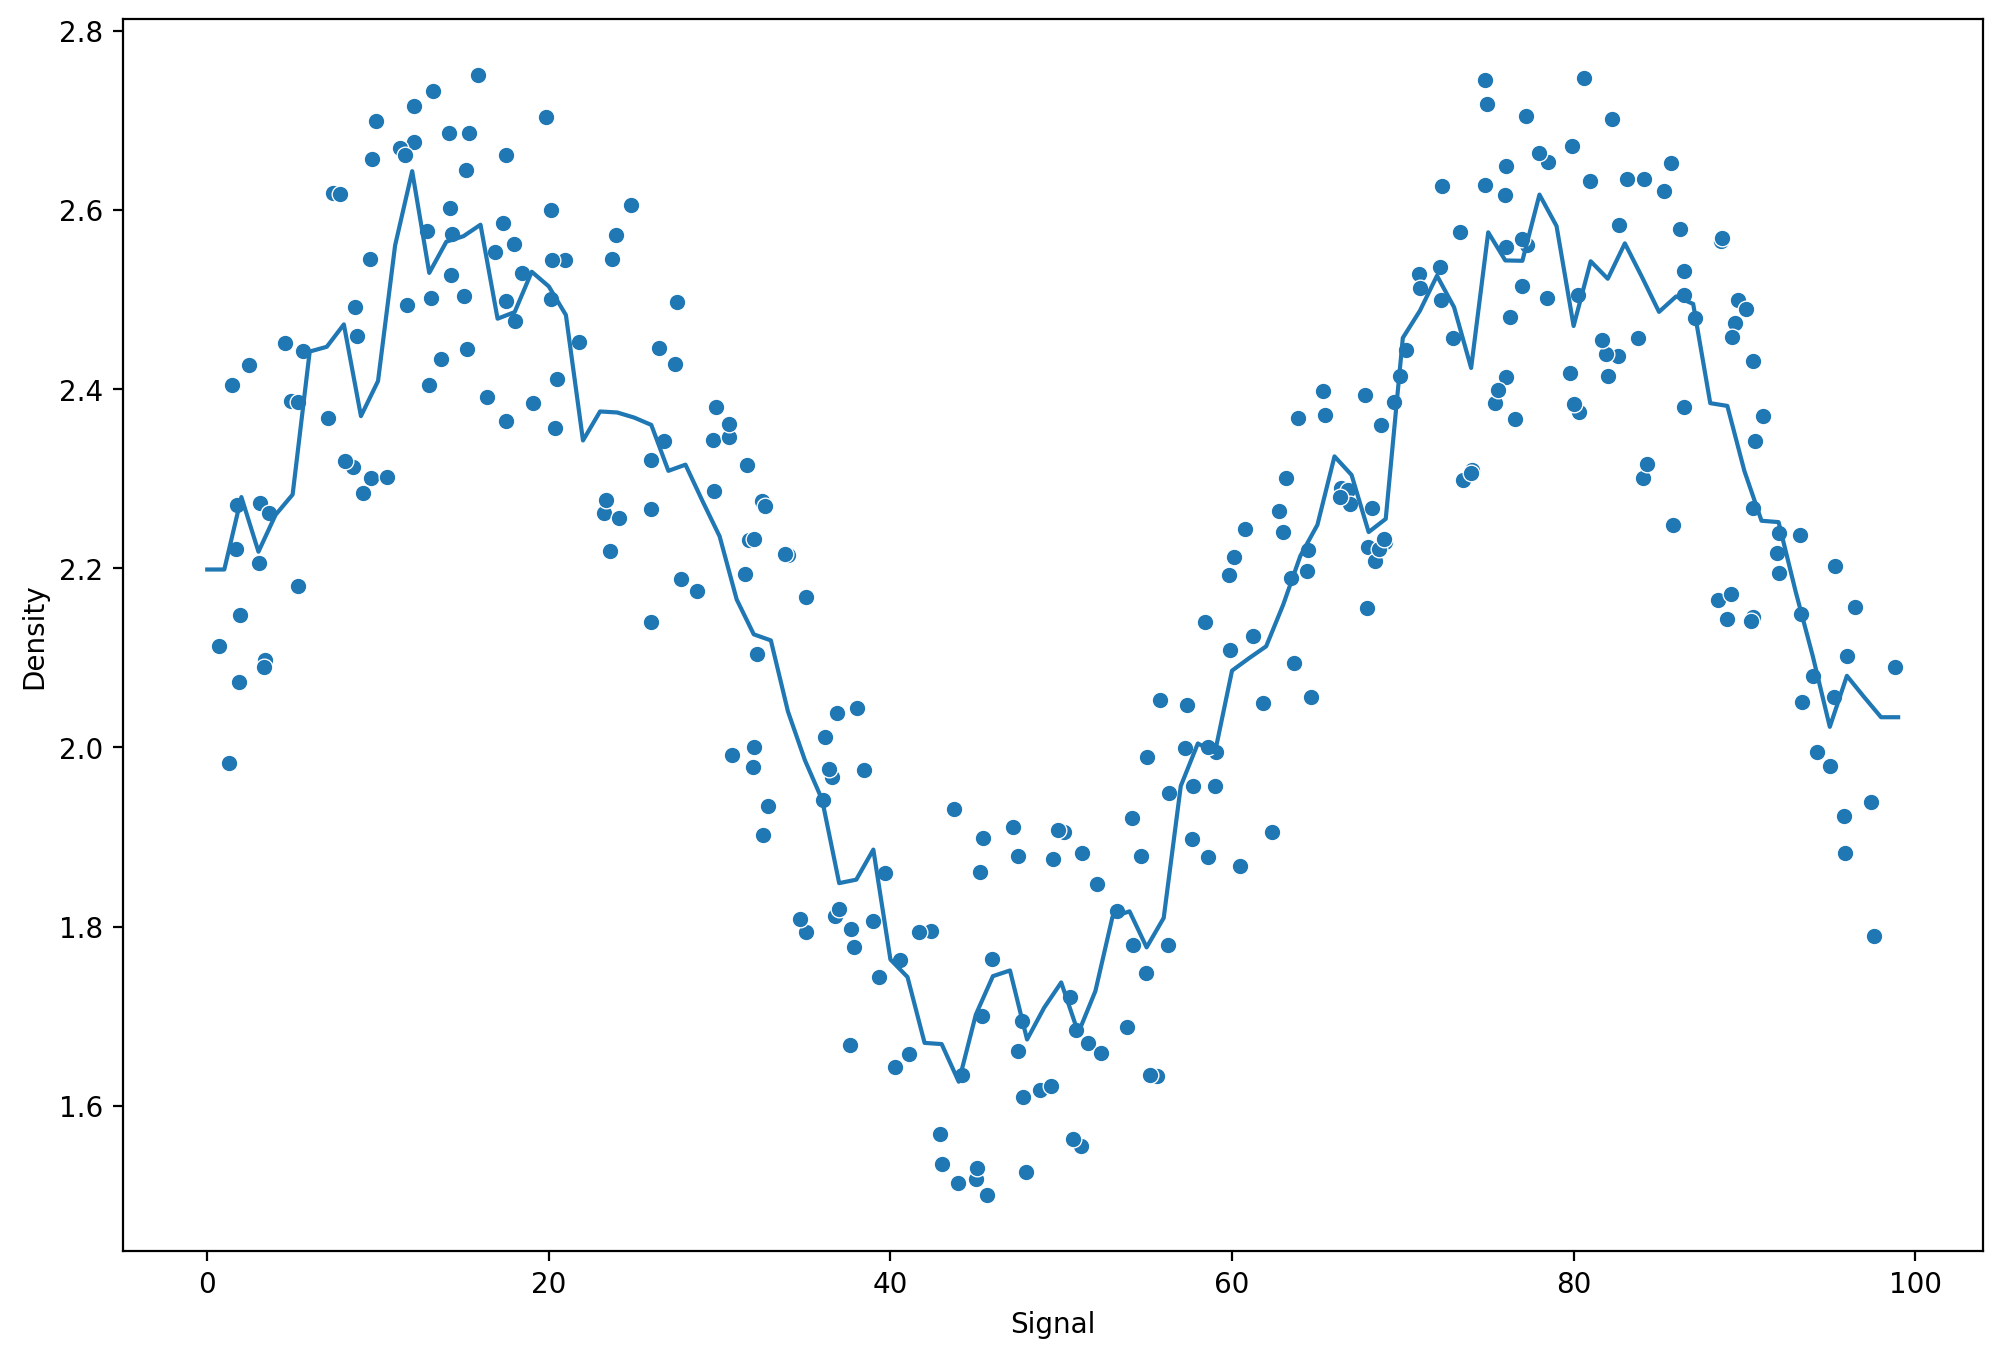

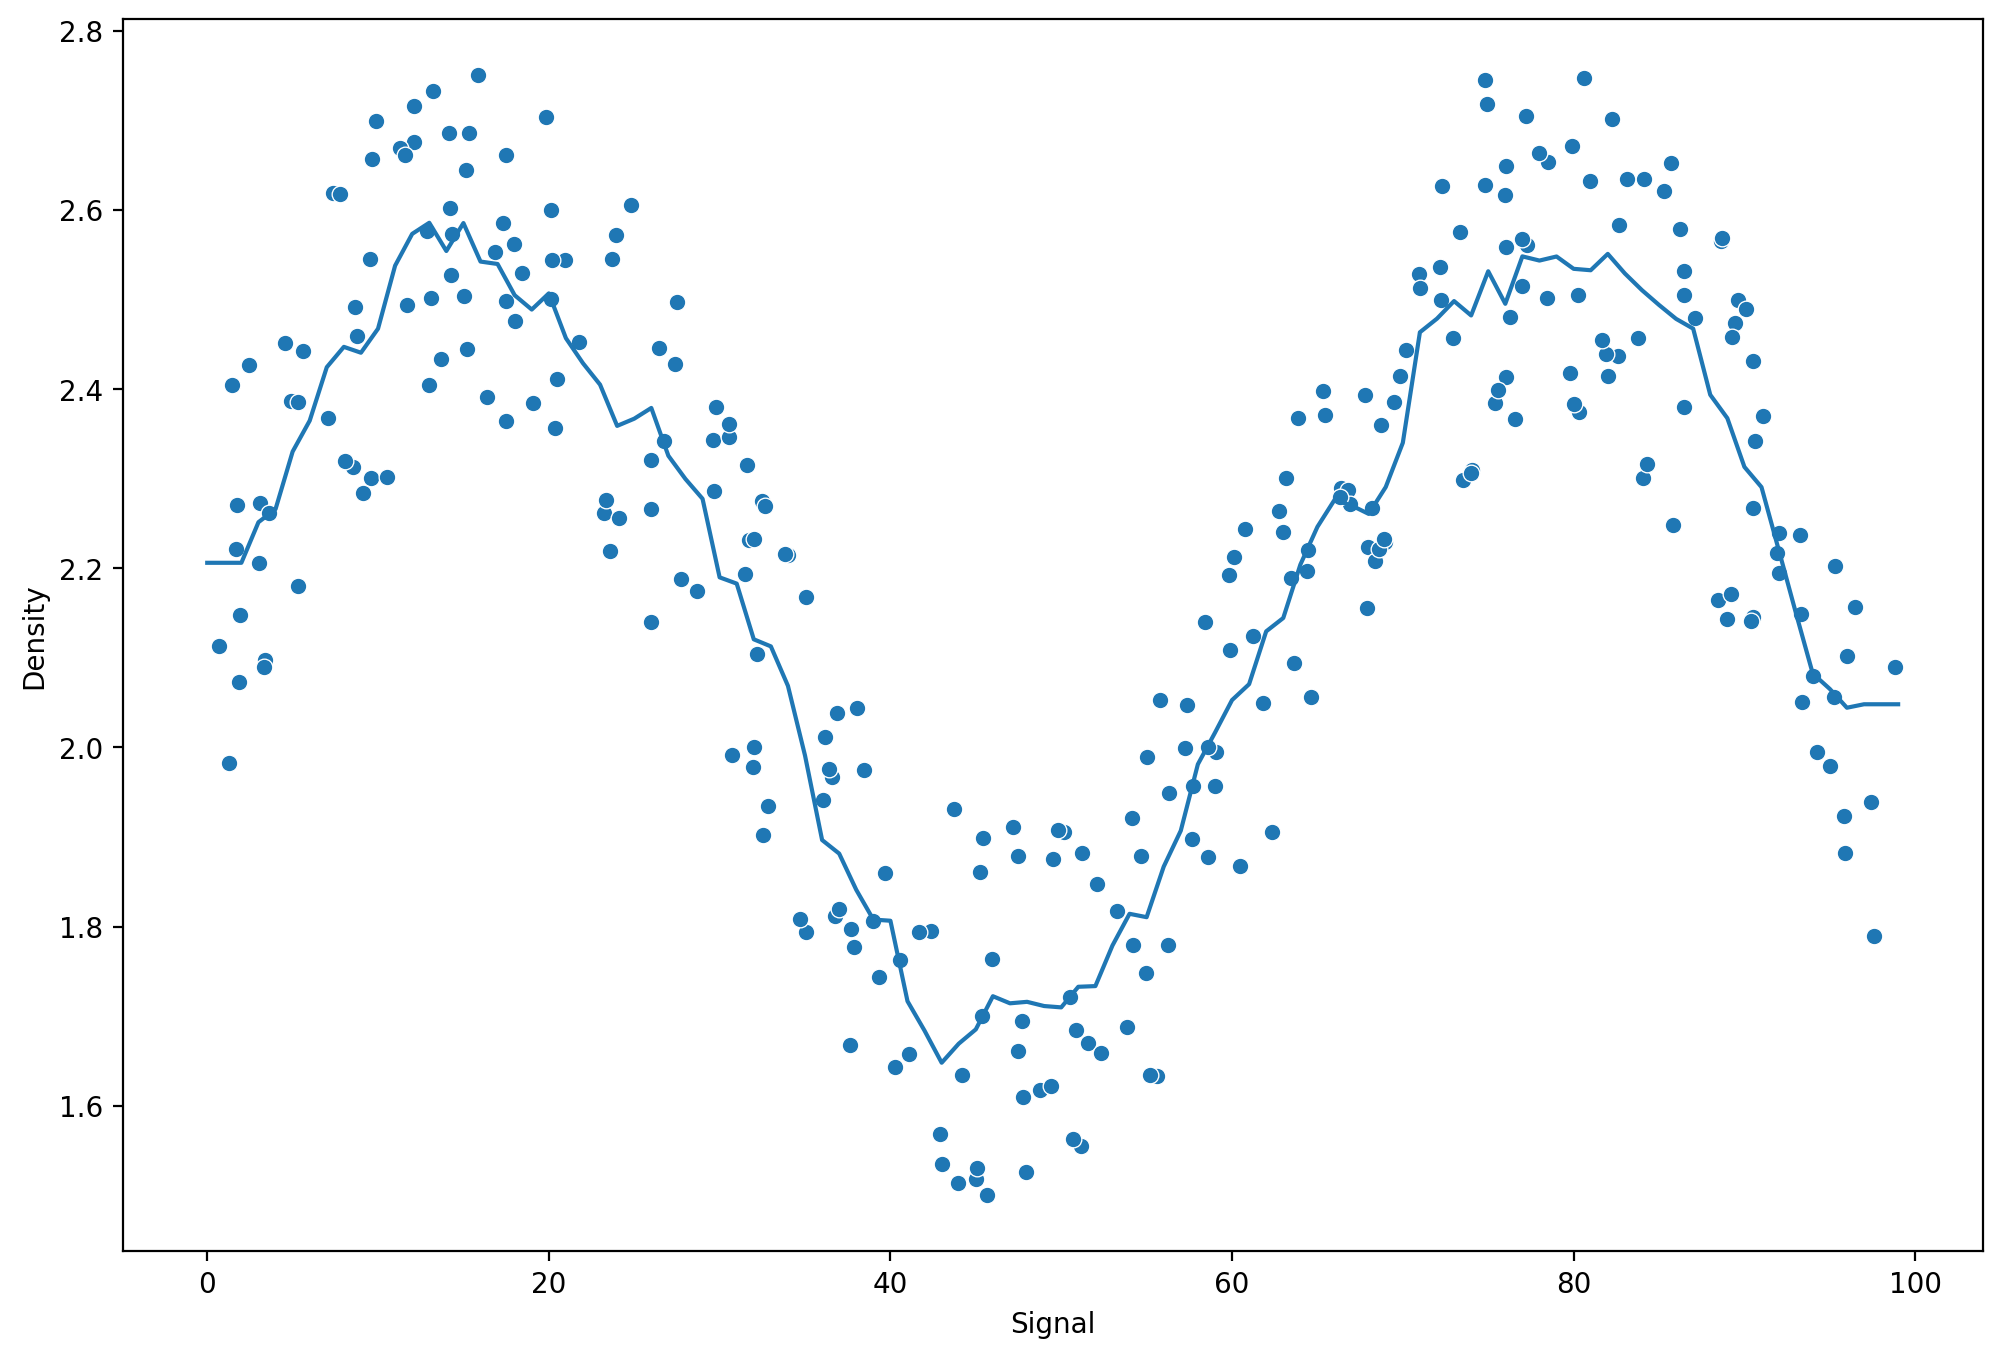

In [37]:
k_values = [1,5,10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,X_test,y_train,y_test)

RMSE: 0.1523487028635337
MSE: 0.11877297474442378


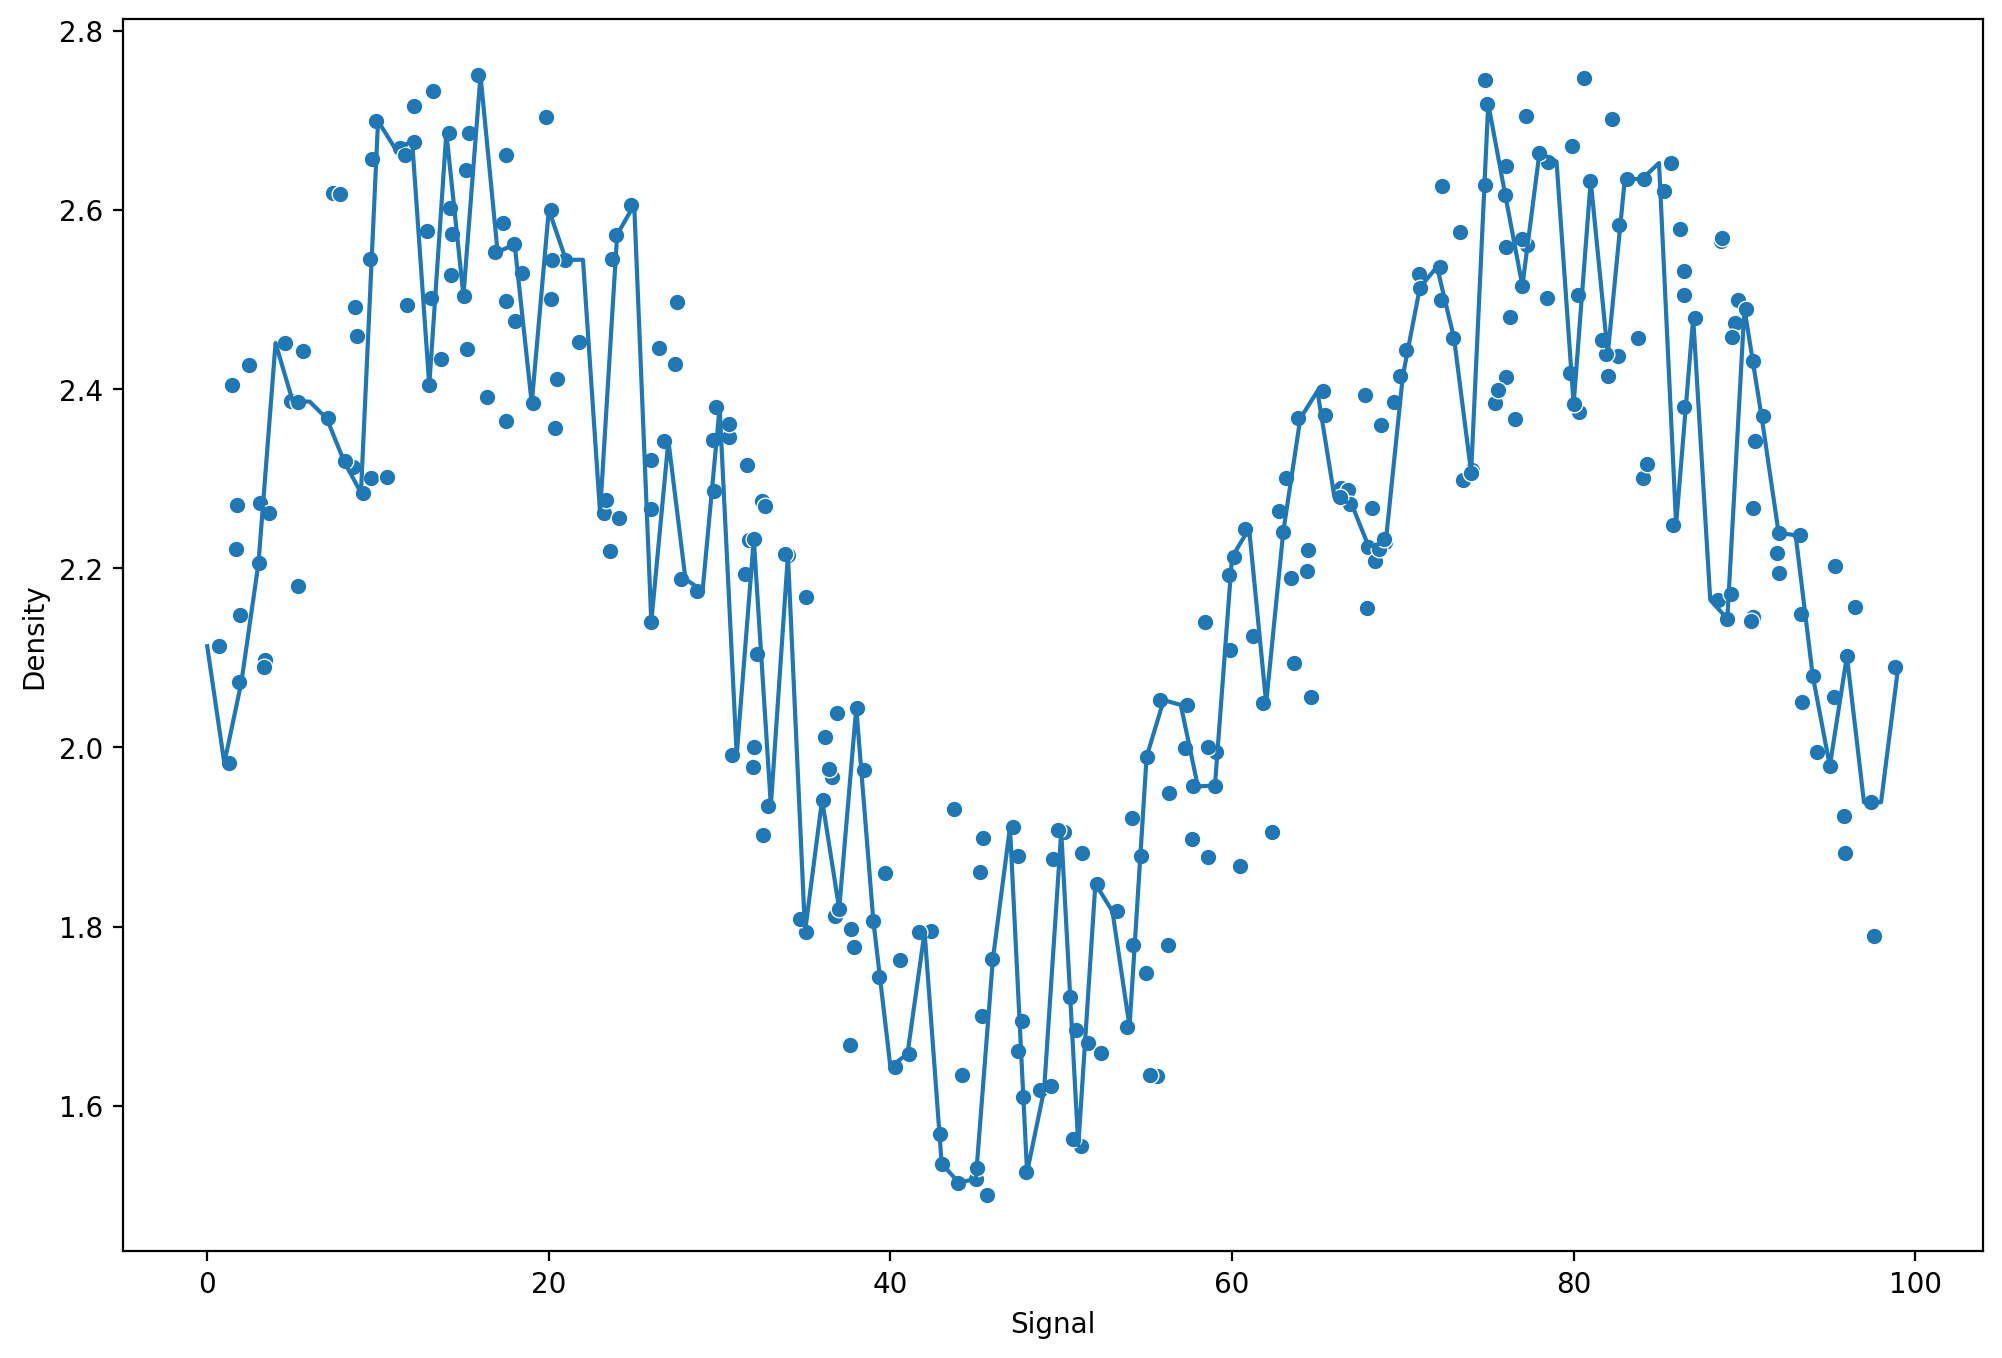

In [39]:
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor()
run_model(m,X_train,X_test,y_train,y_test)

RMSE: 0.13015742723601528
MSE: 0.11243103141068958


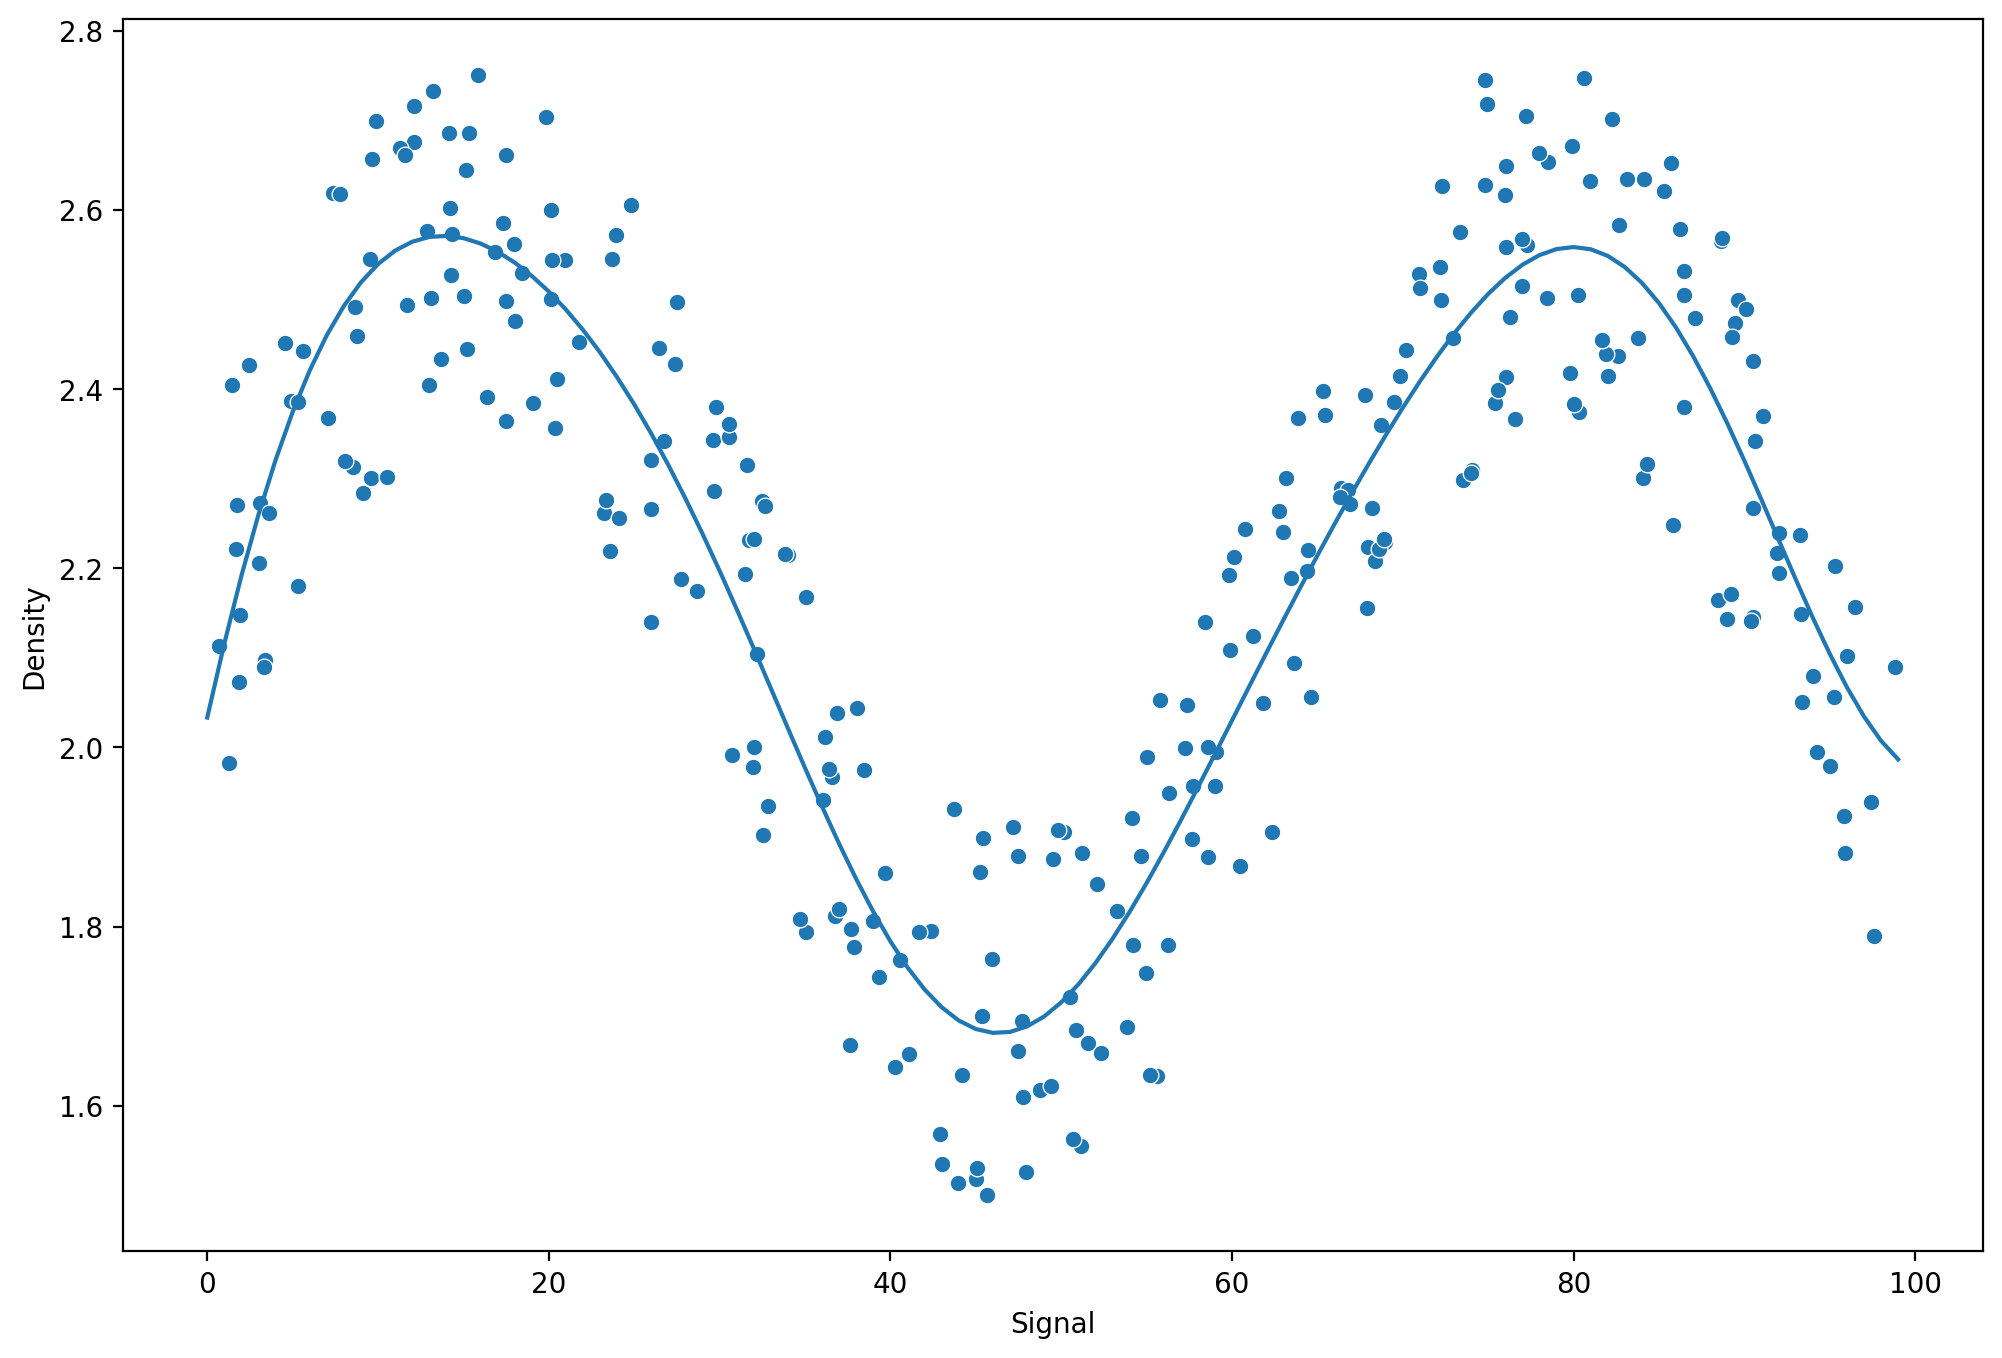

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,X_test,y_train,y_test)

RMSE: 0.13611582499953426
MSE: 0.11061652756554614


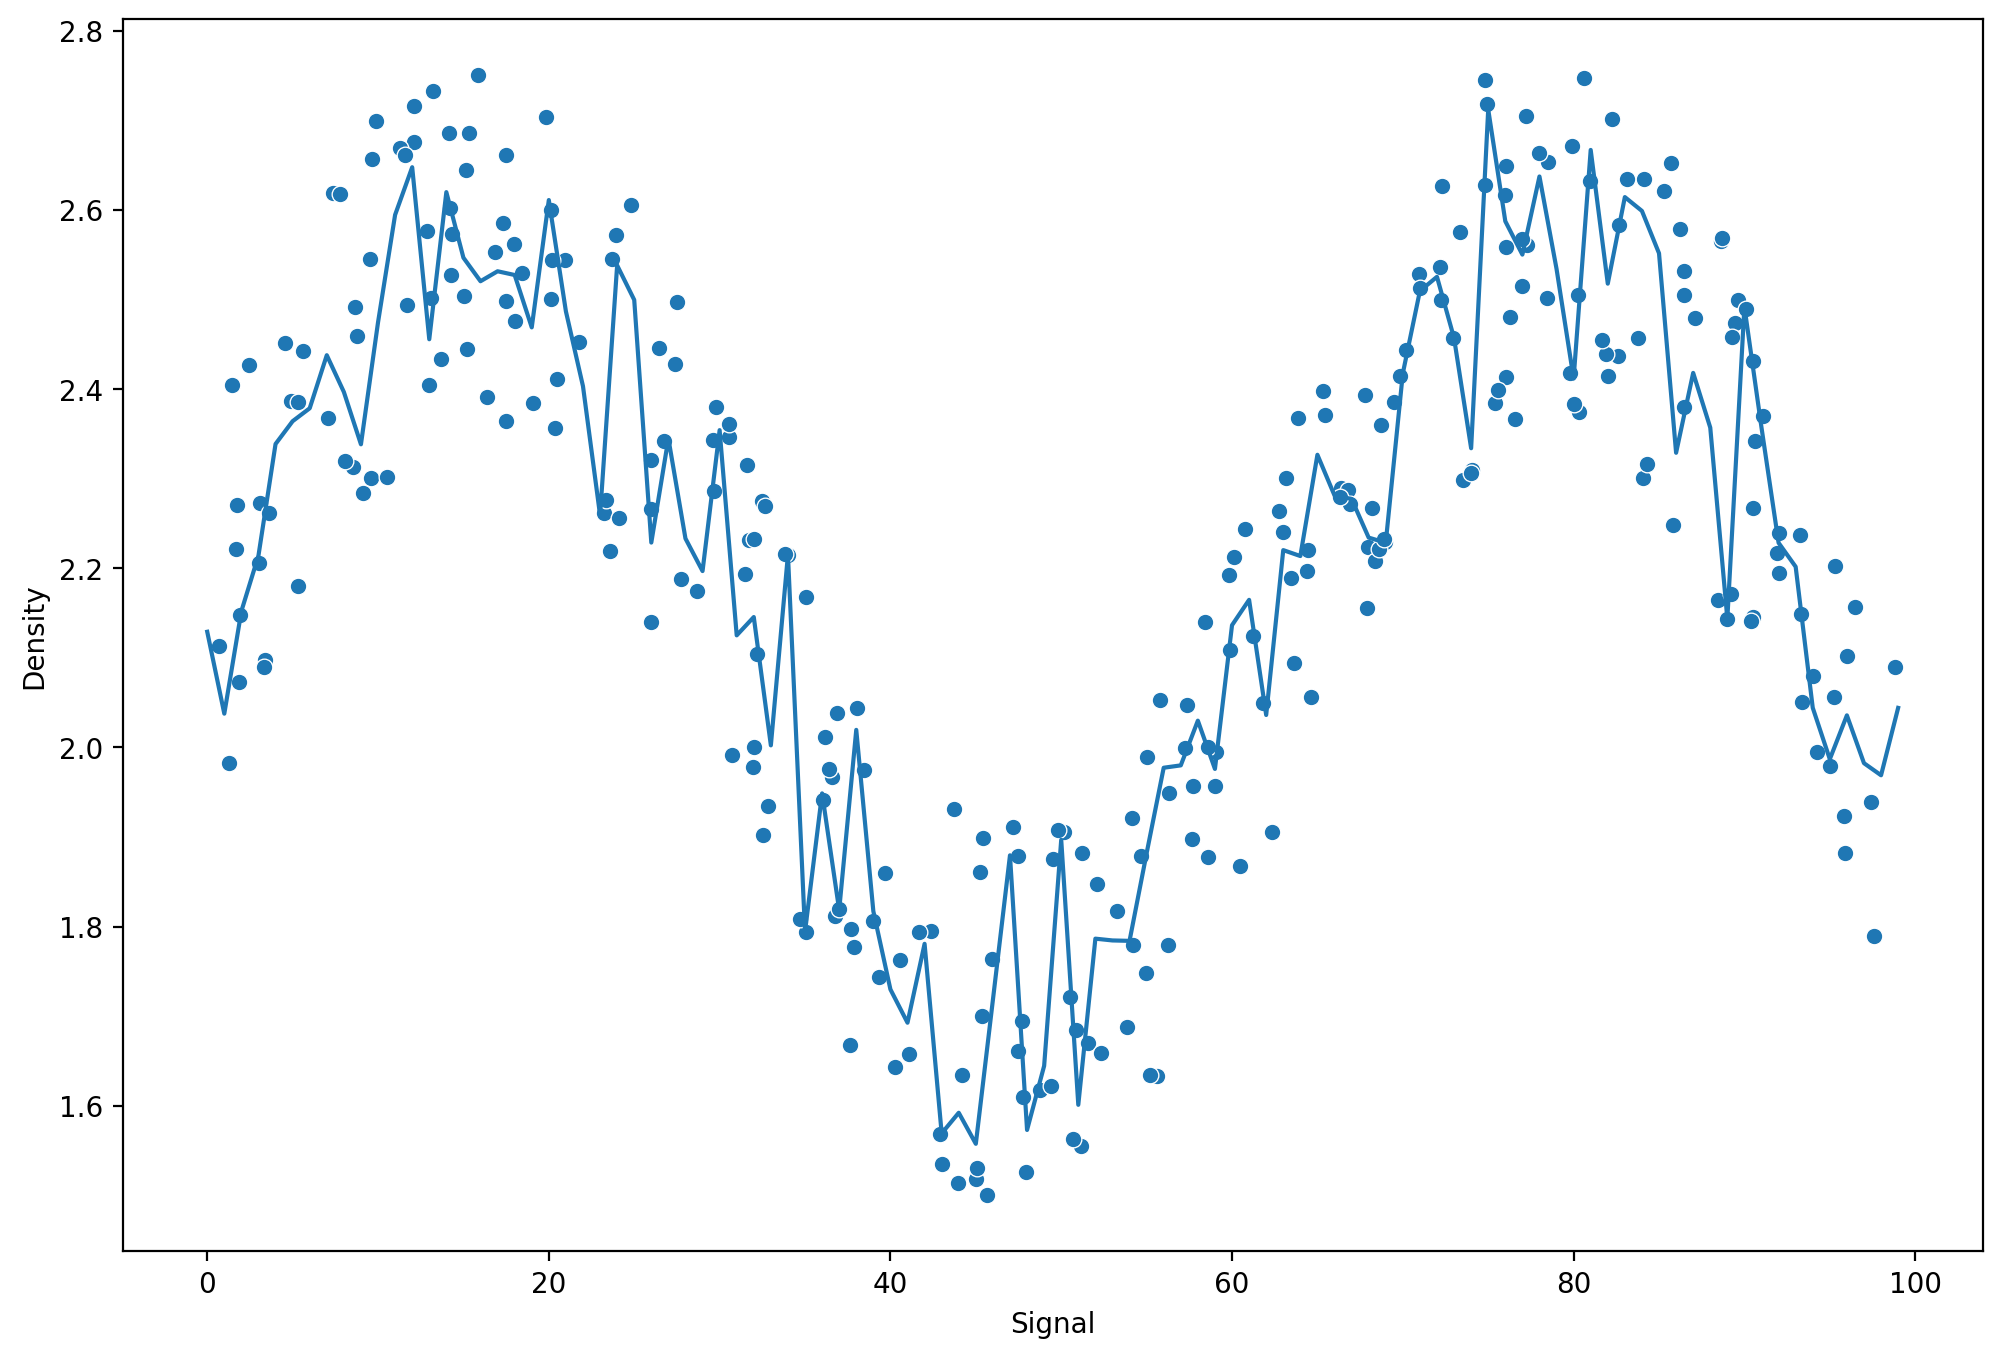

In [41]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,X_test,y_train,y_test)

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MSE: 0.11318284854800689


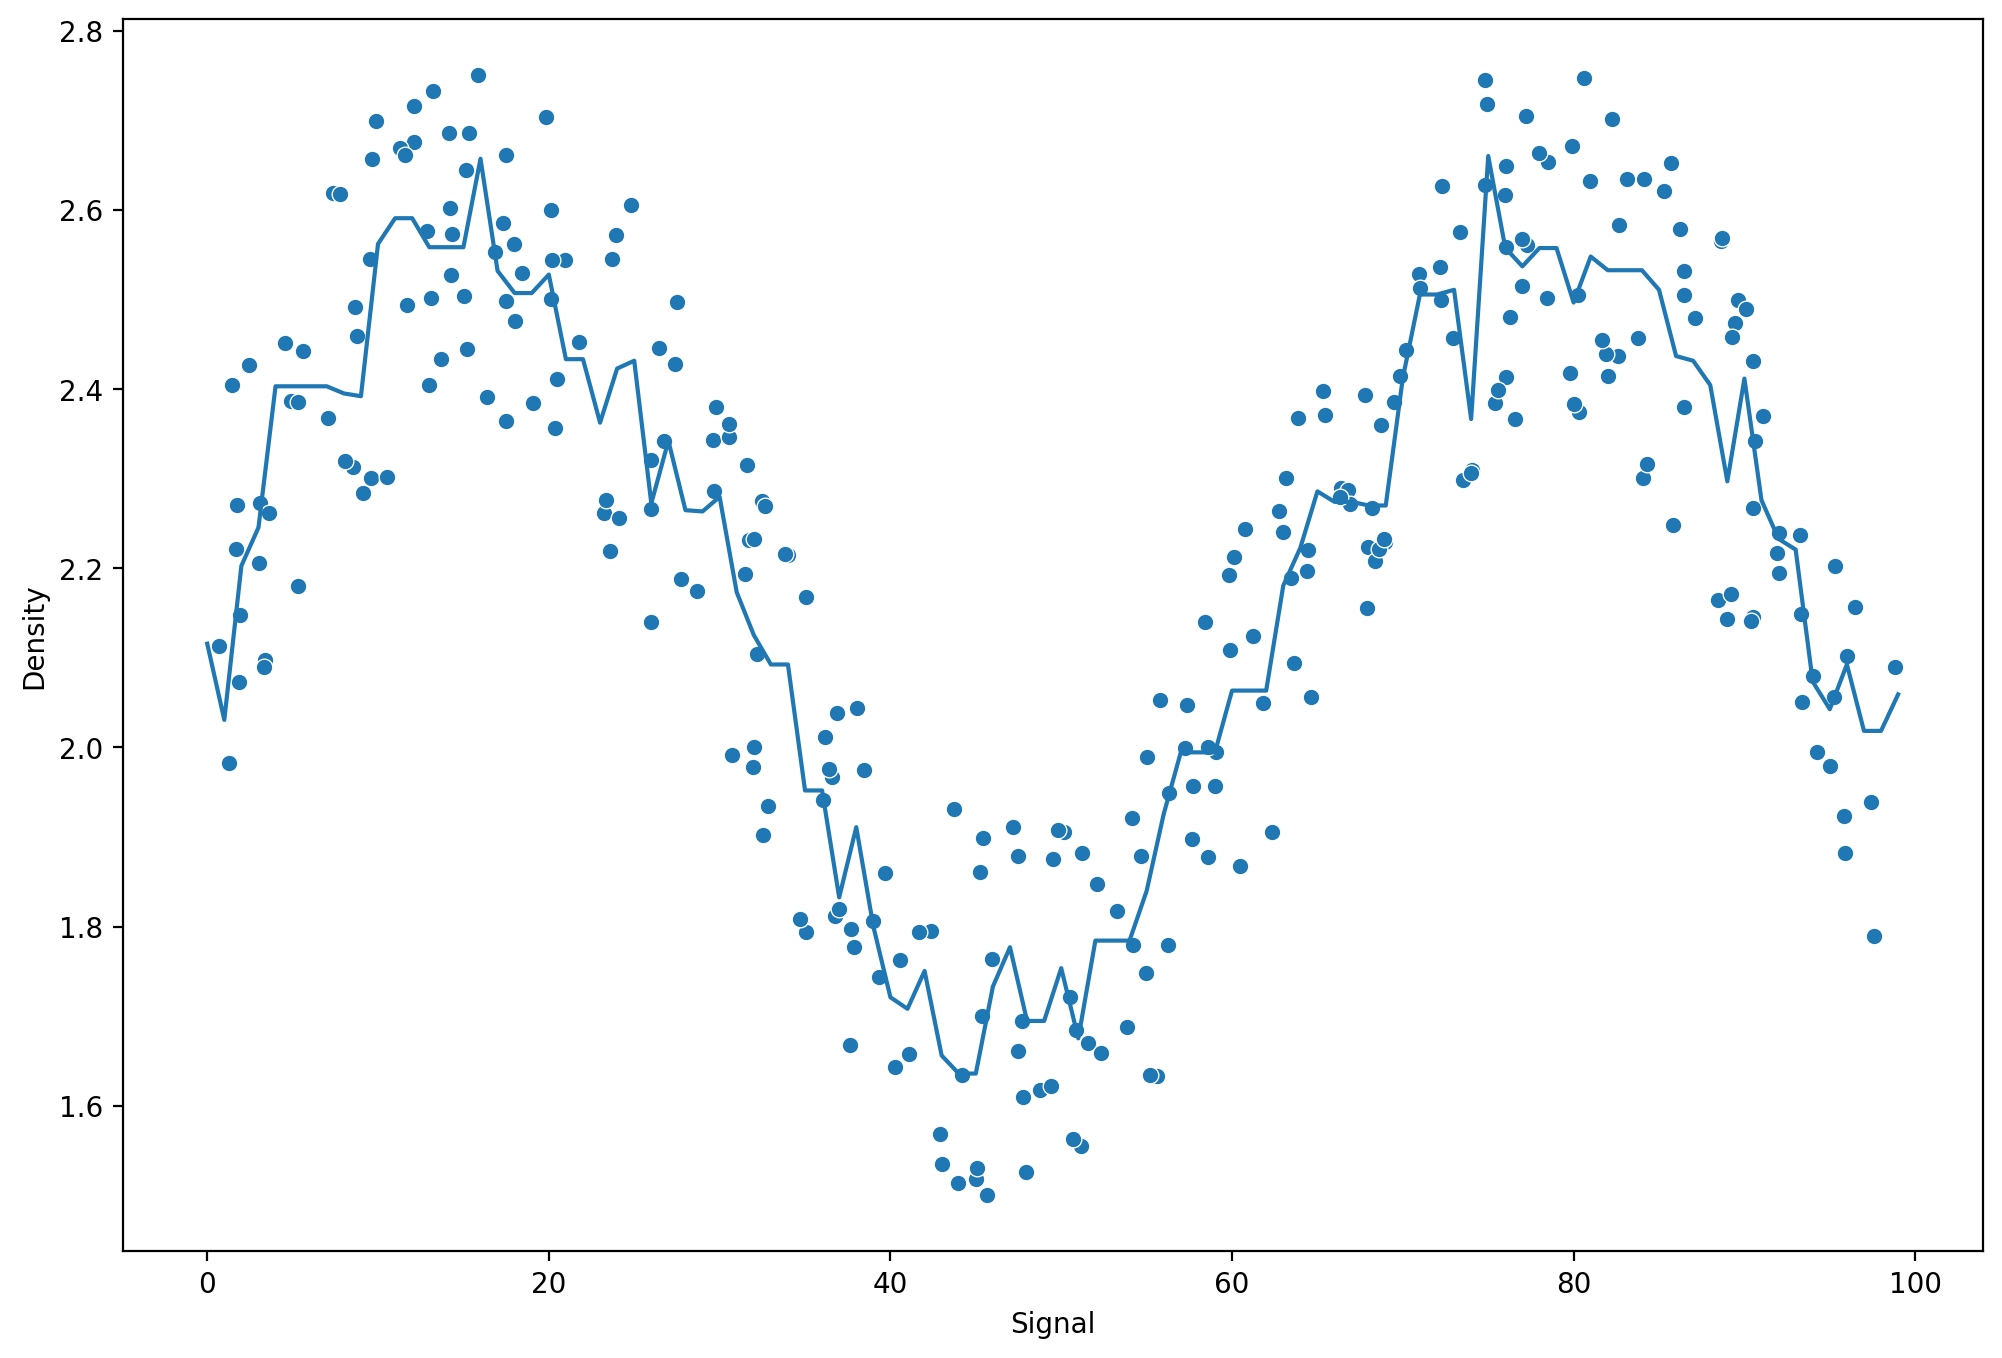

In [43]:
gbr = GradientBoostingRegressor()
run_model(gbr,X_train,X_test,y_train,y_test)

RMSE: 0.14447124894995242
MSE: 0.12682314807915368


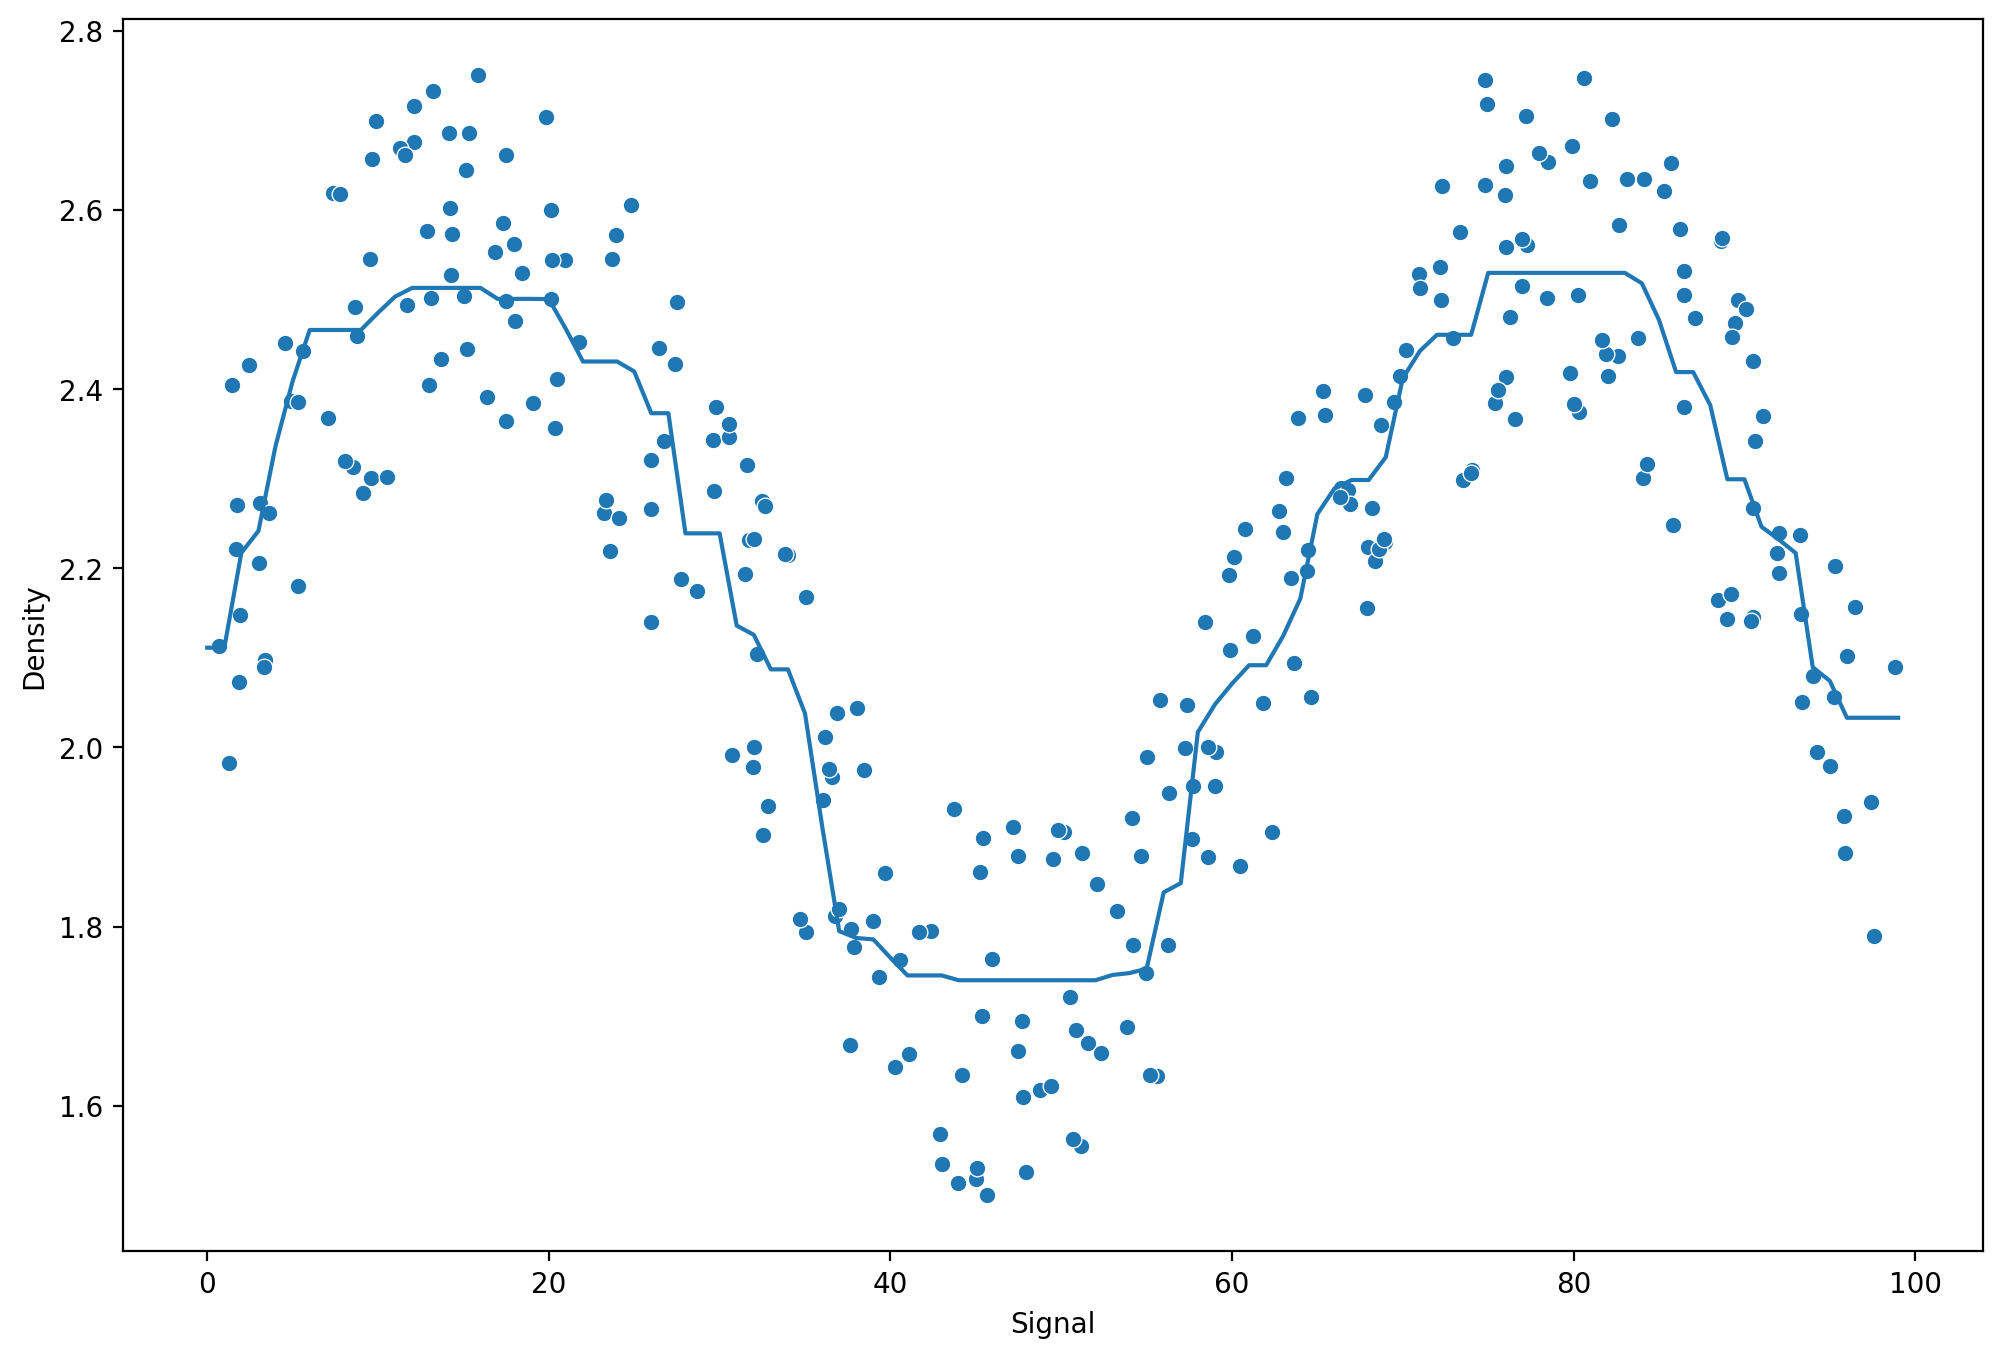

In [44]:
abr = AdaBoostRegressor()
run_model(abr,X_train,X_test,y_train,y_test)